# Introdução ao Projeto

Este notebook faz parte de um desafio técnico para a análise de dados e construção de um modelo preditivo.

**Objetivo:**
O objetivo principal é criar um modelo que identifique potenciais alunos com baixo engajamento (ou risco de reprovação), utilizando os dados de acesso a conteúdos, provas realizadas e outras informações fornecidas.

**Datasets utilizados:**
1. **Alunos**: Informações gerais sobre os alunos.
2. **Provas**: Detalhes das provas realizadas pelos alunos.
3. **Acessos ao conteúdo**: Dados sobre os acessos realizados pelos alunos a materiais de estudo.

**Passos seguidos no projeto:**
1. Leitura e exploração inicial dos dados.
2. Consolidação das tabelas em uma única base por aluno-disciplina.
3. Criação de features importantes para o modelo: `TEMPO_TOTAL_ACESSO`, `TEMPO_MEDIO_NORMALIZADO` e `SEM_ENGAJAMENTO`.
4. Análise exploratória, com gráficos e estatísticas descritivas.
5. Divisão dos dados em treino e teste.
6. Normalização dos dados (quando necessário):
   - As colunas contínuas foram normalizadas utilizando o `MinMaxScaler`, garantindo que os valores estejam no intervalo de 0 a 1. As colunas normalizadas incluem `TEMPO_TOTAL_ACESSO` e `TEMPO_MEDIO_NORMALIZADO`.
7. Treinamento e ajuste do modelo:
   - O modelo escolhido foi o **HistGradientBoostingClassifier**, ajustado com hiperparâmetros após validação cruzada.
   - Foi utilizada uma amostra de 20% dos dados de treino para acelerar o processo de ajuste.
8. Avaliação da performance do modelo:
   - Resultados:
     - **Acurácia:** 81.2%
     - Métricas principais (precision, recall, f1-score) para ambas as classes foram registradas e analisadas.
9. Documentação final.

---

# Descrição dos Dados

1. **Alunos**:
   - `MATRICULA`: Identificador único de cada aluno.
   - `NOME`: Nome do aluno.
   - Outras colunas descritivas.

2. **Provas**:
   - `MATRICULA`: Identificador do aluno.
   - `DISCIPLINA`: Disciplina da prova.
   - `DATA_HORA_AVALIACAO`: Data e hora da avaliação.
   - Outras colunas relacionadas ao desempenho.

3. **Acessos ao conteúdo**:
   - `MATRICULA`: Identificador do aluno.
   - `TEMPO_ACESSO_MINUTOS`: Tempo total de acesso em minutos.
   - `DATA_HORA_ACESSO`: Data e hora do acesso.
   - Outras colunas relacionadas ao engajamento.

---

# Normalização dos Dados

Para padronizar os dados e otimizar o desempenho do modelo, realizei a **normalização** das colunas contínuas:

- Colunas normalizadas:
  - `TEMPO_TOTAL_ACESSO`
  - `TEMPO_MEDIO_NORMALIZADO`

Utilizei o **MinMaxScaler** do `sklearn` para garantir que os valores dessas colunas fossem escalados para o intervalo de 0 a 1.

---

# Treinamento e Avaliação do Modelo

Para identificar alunos com baixo engajamento, implementei o **HistGradientBoostingClassifier**, um modelo robusto para problemas de classificação binária.

**Configuração do modelo:**
- **Hiperparâmetros otimizados:**
  - `learning_rate`: 0.1
  - `max_depth`: 3
  - `max_iter`: 300
  - `min_samples_leaf`: 20
- **Class_weight:** Balanced para tratar o desbalanceamento de classes.
- **Divisão dos dados:** 80% para treino e 20% para teste.

**Resultados:**
- **Acurácia final:** 81.2%
- **Métricas detalhadas:**
  - Precision (classe 1): 0.98
  - Recall (classe 1): 0.89
  - F1-Score (classe 1): 0.93
  - Precision (classe 0): 0.15
  - Recall (classe 0): 0.62
  - F1-Score (classe 0): 0.24

Os resultados indicam que o modelo é eficaz em identificar a classe de maior suporte (alunos engajados), mas apresenta limitações para a classe minoritária. Isso é esperado devido à alta desproporção entre as classes no dataset.

# Conclusão e Considerações Finais

O modelo desenvolvido apresentou resultados promissores no desafio de identificar alunos com baixo engajamento. A seguir, destaco as principais conclusões:

## **Conclusões**
1. **Desempenho Geral**:
   - A acurácia final do modelo foi **81.2%**, o que demonstra um bom desempenho global.
   - A métrica AUC (área sob a curva ROC) foi de **0.81**, indicando uma capacidade razoável de distinguir entre as classes "Engajado" e "Não Engajado".

2. **Análise de Erros**:
   - A classe minoritária ("Não Engajado") obteve um **f1-score de 0.24**, evidenciando desafios na identificação de alunos menos engajados.
   - A matriz de confusão revelou a presença de **falsos negativos** (alunos não engajados classificados como engajados) e **falsos positivos** (alunos engajados classificados como não engajados), destacando a necessidade de atenção ao desbalanceamento de classes.

3. **Impacto do Modelo**:
   - Apesar das limitações para a classe minoritária, o modelo pode ser usado como base para identificar padrões de engajamento e ajudar na tomada de decisões estratégicas, como recomendações ou intervenções direcionadas.





In [2]:
import pandas as pd

In [4]:
caminho_base = r'C:\Users\William\Documents\Documentos Importantes\Trabalho\Principia'

In [8]:
alunos = pd.read_csv(f'{caminho_base}\\alunos_teste.csv')
acessos = pd.read_csv(f'{caminho_base}\\acessos_conteudo_teste.csv')
provas = pd.read_csv(f'{caminho_base}\\provas_teste.csv')

In [10]:
print(alunos.head())

      MATRICULA DISCIPLINA
0  202204035316    DGT0336
1  202110113321    CCJ0164
2  202001682635    DGT0002
3  202204035316    EEX0002
4  202201387645    CCE2063


In [12]:
print(acessos.head())

      DATA_HORA_ACESSO  TEMPO_ACESSO_MINUTOS     MATRICULA DISCIPLINA
0  2022-02-15 00:01:31                     0  202001189726    EGT0019
1  2022-02-16 14:05:00                    54  202001189726    EGT0019
2  2022-02-20 11:32:13                    28  202001189726    EGT0019
3  2022-03-12 23:51:10                     0  202001189726    EGT0019
4  2022-03-23 17:57:53                   120  202001189726    EGT0019


In [14]:
print(provas.head())

   DATA_HORA_AVALIACAO TIPO_AVALIACAO     MATRICULA DISCIPLINA
0  2022-03-02 17:24:00             EX  202008669936    EGT0047
1  2022-03-03 14:01:49             EX  202008669936    ECJ0004
2  2022-02-21 22:53:41             EX  202008669936    EGT0023
3  2022-03-01 12:09:56             EX  202008669936    ARA1350
4  2022-03-03 13:29:38             EX  202008669936    EGT0067


In [20]:
print(alunos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477825 entries, 0 to 1477824
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MATRICULA   1477825 non-null  int64 
 1   DISCIPLINA  1477825 non-null  object
dtypes: int64(1), object(1)
memory usage: 22.5+ MB
None


In [22]:
print(acessos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10445340 entries, 0 to 10445339
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   DATA_HORA_ACESSO      object
 1   TEMPO_ACESSO_MINUTOS  int64 
 2   MATRICULA             int64 
 3   DISCIPLINA            object
dtypes: int64(2), object(2)
memory usage: 318.8+ MB
None


In [24]:
print(provas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684775 entries, 0 to 5684774
Data columns (total 4 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   DATA_HORA_AVALIACAO  object
 1   TIPO_AVALIACAO       object
 2   MATRICULA            int64 
 3   DISCIPLINA           object
dtypes: int64(1), object(3)
memory usage: 173.5+ MB
None


In [26]:
print("Duplicatas no DataFrame 'alunos':", alunos.duplicated().sum())
print("Duplicatas no DataFrame 'acessos':", acessos.duplicated().sum())
print("Duplicatas no DataFrame 'provas':", provas.duplicated().sum())

Duplicatas no DataFrame 'alunos': 171
Duplicatas no DataFrame 'acessos': 359288
Duplicatas no DataFrame 'provas': 2494


In [28]:
# Remover duplicatas
alunos = alunos.drop_duplicates()
acessos = acessos.drop_duplicates()
provas = provas.drop_duplicates()

In [30]:
print("Duplicatas no DataFrame 'alunos':", alunos.duplicated().sum())
print("Duplicatas no DataFrame 'acessos':", acessos.duplicated().sum())
print("Duplicatas no DataFrame 'provas':", provas.duplicated().sum())

Duplicatas no DataFrame 'alunos': 0
Duplicatas no DataFrame 'acessos': 0
Duplicatas no DataFrame 'provas': 0


In [32]:
# Verificar valores ausentes
print("\nValores nulos no DataFrame 'alunos':")
print(alunos.isnull().sum())
print("\nValores nulos no DataFrame 'acessos':")
print(acessos.isnull().sum())
print("\nValores nulos no DataFrame 'provas':")
print(provas.isnull().sum())


Valores nulos no DataFrame 'alunos':
MATRICULA     0
DISCIPLINA    0
dtype: int64

Valores nulos no DataFrame 'acessos':
DATA_HORA_ACESSO        0
TEMPO_ACESSO_MINUTOS    0
MATRICULA               0
DISCIPLINA              0
dtype: int64

Valores nulos no DataFrame 'provas':
DATA_HORA_AVALIACAO    0
TIPO_AVALIACAO         0
MATRICULA              0
DISCIPLINA             0
dtype: int64


In [34]:
import matplotlib.pyplot as plt

In [36]:
print(acessos['TEMPO_ACESSO_MINUTOS'].describe())

count    1.008605e+07
mean     2.629791e+01
std      4.238125e+01
min      0.000000e+00
25%      0.000000e+00
50%      7.000000e+00
75%      3.700000e+01
max      7.570000e+02
Name: TEMPO_ACESSO_MINUTOS, dtype: float64


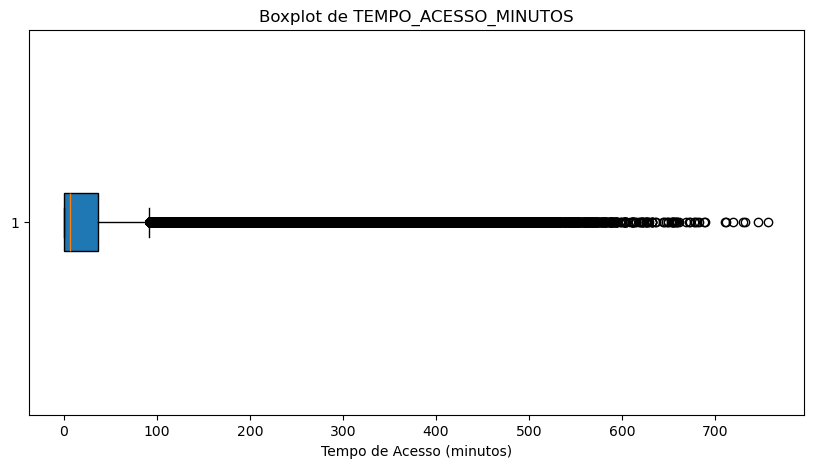

In [38]:
# Boxplot para identificar outliers
plt.figure(figsize=(10, 5))
plt.boxplot(acessos['TEMPO_ACESSO_MINUTOS'], vert=False, patch_artist=True)
plt.title('Boxplot de TEMPO_ACESSO_MINUTOS')
plt.xlabel('Tempo de Acesso (minutos)')
plt.show()

In [40]:
# Calcular limites com base no IQR
Q1 = acessos['TEMPO_ACESSO_MINUTOS'].quantile(0.25)
Q3 = acessos['TEMPO_ACESSO_MINUTOS'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

In [42]:
# Remover outliers
acessos_filtrado = acessos[acessos['TEMPO_ACESSO_MINUTOS'] <= limite_superior]

In [44]:
print(acessos_filtrado['TEMPO_ACESSO_MINUTOS'].describe())

count    9.357564e+06
mean     1.706973e+01
std      2.267867e+01
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e+00
75%      2.800000e+01
max      9.200000e+01
Name: TEMPO_ACESSO_MINUTOS, dtype: float64


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
# Normalizar 'TEMPO_ACESSO_MINUTOS'
acessos_filtrado.loc[:, 'TEMPO_ACESSO_NORMALIZADO'] = scaler.fit_transform(acessos_filtrado[['TEMPO_ACESSO_MINUTOS']])

In [56]:
print("Estatísticas do 'TEMPO_ACESSO_NORMALIZADO':")
print(acessos_filtrado['TEMPO_ACESSO_NORMALIZADO'].describe())

Estatísticas do 'TEMPO_ACESSO_NORMALIZADO':
count    9.357564e+06
mean     1.855405e-01
std      2.465073e-01
min      0.000000e+00
25%      0.000000e+00
50%      5.434783e-02
75%      3.043478e-01
max      1.000000e+00
Name: TEMPO_ACESSO_NORMALIZADO, dtype: float64


In [60]:
# Unir 'alunos' e 'acessos_filtrado' com base em 'MATRICULA' e 'DISCIPLINA'
alunos_acessos = pd.merge(alunos, acessos_filtrado, on=['MATRICULA', 'DISCIPLINA'], how='left')

In [62]:
# Unir o resultado com 'provas'
dados_completos = pd.merge(alunos_acessos, provas, on=['MATRICULA', 'DISCIPLINA'], how='left')

In [64]:
print("Primeiras linhas do DataFrame unido:")
print(dados_completos.head())

Primeiras linhas do DataFrame unido:
      MATRICULA DISCIPLINA     DATA_HORA_ACESSO  TEMPO_ACESSO_MINUTOS  \
0  202204035316    DGT0336                  NaN                   NaN   
1  202110113321    CCJ0164                  NaN                   NaN   
2  202001682635    DGT0002                  NaN                   NaN   
3  202204035316    EEX0002                  NaN                   NaN   
4  202201387645    CCE2063  2022-04-19 12:17:18                  58.0   

   TEMPO_ACESSO_NORMALIZADO  DATA_HORA_AVALIACAO TIPO_AVALIACAO  
0                       NaN                  NaN            NaN  
1                       NaN                  NaN            NaN  
2                       NaN                  NaN            NaN  
3                       NaN                  NaN            NaN  
4                  0.630435  2022-04-29 09:00:43             EX  


In [66]:
# Participou de avaliações SM (1: Sim, 0: Não)
dados_completos['PARTICIPOU_SM'] = dados_completos['TIPO_AVALIACAO'].apply(lambda x: 1 if x == 'SM' else 0)

In [68]:
# Agregar informações de engajamento por aluno-disciplina
engajamento = dados_completos.groupby(['MATRICULA', 'DISCIPLINA']).agg({
    'TEMPO_ACESSO_MINUTOS': 'sum',  # Tempo total de acesso
    'TEMPO_ACESSO_NORMALIZADO': 'mean',  # Tempo médio normalizado
    'PARTICIPOU_SM': 'max'  # Indicador de participação
}).reset_index()

In [70]:
# Renomear colunas para maior clareza
engajamento.rename(columns={
    'TEMPO_ACESSO_MINUTOS': 'TEMPO_TOTAL_ACESSO',
    'TEMPO_ACESSO_NORMALIZADO': 'TEMPO_MEDIO_NORMALIZADO',
    'PARTICIPOU_SM': 'TARGET'
}, inplace=True)

In [72]:
print("DataFrame final com features e target:")
print(engajamento.head())

DataFrame final com features e target:
      MATRICULA DISCIPLINA  TEMPO_TOTAL_ACESSO  TEMPO_MEDIO_NORMALIZADO  \
0  199501668069    GST1742                 0.0                      NaN   
1  199801350498    ARA1347                 0.0                      NaN   
2  199801350498    ARA1350                 0.0                      NaN   
3  199801350498    EEX0002                 0.0                      NaN   
4  199801350498    EGT0003                 0.0                      NaN   

   TARGET  
0       0  
1       0  
2       0  
3       0  
4       0  


In [74]:
from sklearn.model_selection import train_test_split

In [76]:
# Selecionar features e target
X = engajamento[['TEMPO_TOTAL_ACESSO', 'TEMPO_MEDIO_NORMALIZADO']]
y = engajamento['TARGET']

In [78]:
# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
print("Dimensões dos conjuntos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Dimensões dos conjuntos:
X_train: (1182123, 2)
X_test: (295531, 2)
y_train: (1182123,)
y_test: (295531,)


## Usando o modelo XGBoost

In [82]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [88]:
# Inicializar o modelo XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

In [90]:
# Treinar o modelo
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [92]:
# Fazer previsões nos dados de teste
y_pred_xgb = xgb_model.predict(X_test)

In [94]:
print("Relatório de Classificação - XGBoost:")
print(classification_report(y_test, y_pred_xgb))

print("Acurácia do modelo XGBoost:", accuracy_score(y_test, y_pred_xgb))

Relatório de Classificação - XGBoost:
              precision    recall  f1-score   support

           0       0.60      0.74      0.66    105193
           1       0.84      0.72      0.77    190338

    accuracy                           0.73    295531
   macro avg       0.72      0.73      0.72    295531
weighted avg       0.75      0.73      0.73    295531

Acurácia do modelo XGBoost: 0.7293481902067803


## Comparar com HistGradientBoostingClassifier

In [105]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [107]:
# Inicializar o modelo HistGradientBoostingClassifier
hgb_model = HistGradientBoostingClassifier(random_state=42)

In [109]:
# Treinar o modelo
hgb_model.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [111]:
# Fazer previsões
y_pred_hgb = hgb_model.predict(X_test)

In [113]:
print("\nRelatório de Classificação - HistGradientBoostingClassifier:")
print(classification_report(y_test, y_pred_hgb))

print("Acurácia do modelo HistGradientBoostingClassifier:", accuracy_score(y_test, y_pred_hgb))


Relatório de Classificação - HistGradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.59      0.73      0.65    105193
           1       0.83      0.72      0.77    190338

    accuracy                           0.72    295531
   macro avg       0.71      0.73      0.71    295531
weighted avg       0.74      0.72      0.73    295531

Acurácia do modelo HistGradientBoostingClassifier: 0.7234198781176933


In [115]:
# Contar valores nulos por coluna no DataFrame final
print("Valores nulos no DataFrame 'dados_completos':")
print(dados_completos.isnull().sum())

Valores nulos no DataFrame 'dados_completos':
MATRICULA                         0
DISCIPLINA                        0
DATA_HORA_ACESSO            1310384
TEMPO_ACESSO_MINUTOS        1310384
TEMPO_ACESSO_NORMALIZADO    1310384
DATA_HORA_AVALIACAO          937000
TIPO_AVALIACAO               937000
PARTICIPOU_SM                     0
dtype: int64


## Aproveitando valores nulos

In [118]:
# Criar uma nova feature indicando falta de engajamento
dados_completos['SEM_ENGAJAMENTO'] = dados_completos[['TEMPO_ACESSO_MINUTOS', 'DATA_HORA_AVALIACAO']].isnull().all(axis=1).astype(int)

In [120]:
print("Distribuição da nova feature 'SEM_ENGAJAMENTO':")
print(dados_completos['SEM_ENGAJAMENTO'].value_counts())

Distribuição da nova feature 'SEM_ENGAJAMENTO':
SEM_ENGAJAMENTO
0    76463753
1      236472
Name: count, dtype: int64


In [124]:
# Adicionar a nova feature 'SEM_ENGAJAMENTO' ao DataFrame 'engajamento'
engajamento = engajamento.merge(
    dados_completos[['MATRICULA', 'DISCIPLINA', 'SEM_ENGAJAMENTO']],
    on=['MATRICULA', 'DISCIPLINA'],
    how='left'
)

In [126]:
# Atualizar o conjunto de features (X) para incluir 'SEM_ENGAJAMENTO'
X = engajamento[['TEMPO_TOTAL_ACESSO', 'TEMPO_MEDIO_NORMALIZADO', 'SEM_ENGAJAMENTO']]

In [128]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, engajamento['TARGET'], test_size=0.2, random_state=42)

In [130]:
print("Novas dimensões dos conjuntos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Novas dimensões dos conjuntos:
X_train: (61360180, 3)
X_test: (15340045, 3)


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [140]:
# Refazer a divisão do dataset
X = engajamento[['TEMPO_TOTAL_ACESSO', 'TEMPO_MEDIO_NORMALIZADO', 'SEM_ENGAJAMENTO']]
y = engajamento['TARGET']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Treinar o HistGradientBoostingClassifier com os dados corretos
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [146]:
# Fazer previsões no conjunto de teste
y_pred_hgb = hgb_model.predict(X_test)

In [148]:
print("\nRelatório de Classificação - HistGradientBoostingClassifier com SEM_ENGAJAMENTO:")
print(classification_report(y_test, y_pred_hgb))

print("Acurácia do modelo HistGradientBoostingClassifier:", accuracy_score(y_test, y_pred_hgb))


Relatório de Classificação - HistGradientBoostingClassifier com SEM_ENGAJAMENTO:
              precision    recall  f1-score   support

           0       0.87      0.14      0.24    724705
           1       0.96      1.00      0.98  14615340

    accuracy                           0.96  15340045
   macro avg       0.91      0.57      0.61  15340045
weighted avg       0.95      0.96      0.94  15340045

Acurácia do modelo HistGradientBoostingClassifier: 0.9584129642383709


## Ajustar pesos das classes

In [151]:
# Ajustar pesos das classes no HistGradientBoostingClassifier
hgb_model_balanced = HistGradientBoostingClassifier(random_state=42, class_weight='balanced')

In [153]:
# Treinar o modelo com os pesos ajustados
hgb_model_balanced.fit(X_train, y_train)

HistGradientBoostingClassifier(class_weight='balanced', random_state=42)

In [155]:
# Fazer previsões no conjunto de teste
y_pred_hgb_balanced = hgb_model_balanced.predict(X_test)

In [157]:
print("\nRelatório de Classificação - HistGradientBoostingClassifier com class_weight='balanced':")
print(classification_report(y_test, y_pred_hgb_balanced))

print("Acurácia do modelo com class_weight='balanced':", accuracy_score(y_test, y_pred_hgb_balanced))


Relatório de Classificação - HistGradientBoostingClassifier com class_weight='balanced':
              precision    recall  f1-score   support

           0       0.15      0.65      0.25    724705
           1       0.98      0.82      0.89  14615340

    accuracy                           0.81  15340045
   macro avg       0.57      0.73      0.57  15340045
weighted avg       0.94      0.81      0.86  15340045

Acurácia do modelo com class_weight='balanced': 0.8125942264185014


## Otimização com GridSearchCV

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [182]:
# Criar uma amostra do conjunto de treino (20% dos dados)
X_train_sample = X_train.sample(frac=0.2, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

In [184]:
# Definir a grade de parâmetros para RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [10, 20, 30],
    'max_iter': [100, 200, 300]
}

In [186]:
# Configurar o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid,
    n_iter=30,  # Número de combinações aleatórias a testar
    scoring='f1',
    cv=3,  # Validação cruzada com 3 divisões
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [188]:
# Executar o ajuste com a amostra menor
random_search.fit(X_train_sample, y_train_sample)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=HistGradientBoostingClassifier(class_weight='balanced',
                                                            random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'max_iter': [100, 200, 300],
                                        'min_samples_leaf': [10, 20, 30]},
                   random_state=42, scoring='f1', verbose=2)

In [190]:
print("Melhores parâmetros encontrados:", random_search.best_params_)
print("Melhor f1-score obtido:", random_search.best_score_)

Melhores parâmetros encontrados: {'min_samples_leaf': 20, 'max_iter': 300, 'max_depth': 3, 'learning_rate': 0.1}
Melhor f1-score obtido: 0.8951298994173759


In [194]:
# Re-treinar o modelo completo com os melhores parâmetros
best_params = random_search.best_params_

final_model = HistGradientBoostingClassifier(
    random_state=42,
    class_weight='balanced',
    **best_params
)

final_model.fit(X_train, y_train)

HistGradientBoostingClassifier(class_weight='balanced', max_depth=3,
                               max_iter=300, random_state=42)

In [196]:
# Fazer previsões no conjunto de teste
y_pred_final = final_model.predict(X_test)

In [198]:
# Avaliar o modelo final
from sklearn.metrics import classification_report, accuracy_score

In [200]:
print("\nRelatório de Classificação - Modelo Final:")
print(classification_report(y_test, y_pred_final))
print("Acurácia do modelo final:", accuracy_score(y_test, y_pred_final))


Relatório de Classificação - Modelo Final:
              precision    recall  f1-score   support

           0       0.15      0.61      0.24    724705
           1       0.98      0.83      0.90  14615340

    accuracy                           0.82  15340045
   macro avg       0.56      0.72      0.57  15340045
weighted avg       0.94      0.82      0.87  15340045

Acurácia do modelo final: 0.8172736129522437


## Histograma para TEMPO_TOTAL_ACESSO

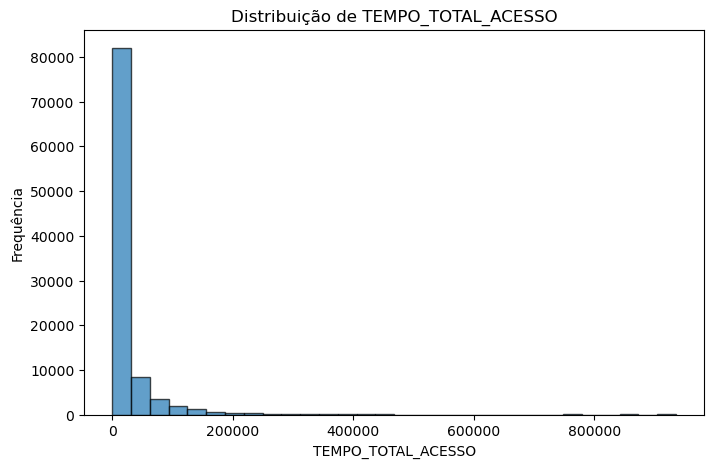

In [203]:
# Amostragem
sample_size = 100000  # Limite para amostragem
amostra_dados = engajamento.sample(n=sample_size, random_state=42) if len(engajamento) > sample_size else engajamento

# Criar o histograma para TEMPO_TOTAL_ACESSO
plt.figure(figsize=(8, 5))
plt.hist(amostra_dados['TEMPO_TOTAL_ACESSO'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribuição de TEMPO_TOTAL_ACESSO")
plt.xlabel("TEMPO_TOTAL_ACESSO")
plt.ylabel("Frequência")
plt.show()

<Figure size 800x500 with 0 Axes>

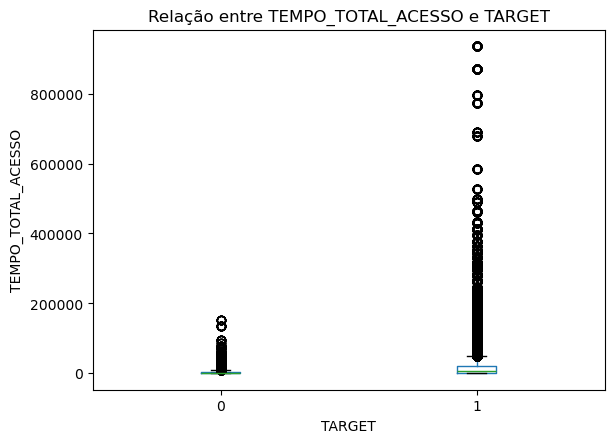

In [205]:
# Boxplot para relação entre TEMPO_TOTAL_ACESSO e TARGET
plt.figure(figsize=(8, 5))
amostra_dados.boxplot(column='TEMPO_TOTAL_ACESSO', by='TARGET', grid=False)
plt.title("Relação entre TEMPO_TOTAL_ACESSO e TARGET")
plt.suptitle("")  # Remove o título padrão do Pandas
plt.xlabel("TARGET")
plt.ylabel("TEMPO_TOTAL_ACESSO")
plt.show()

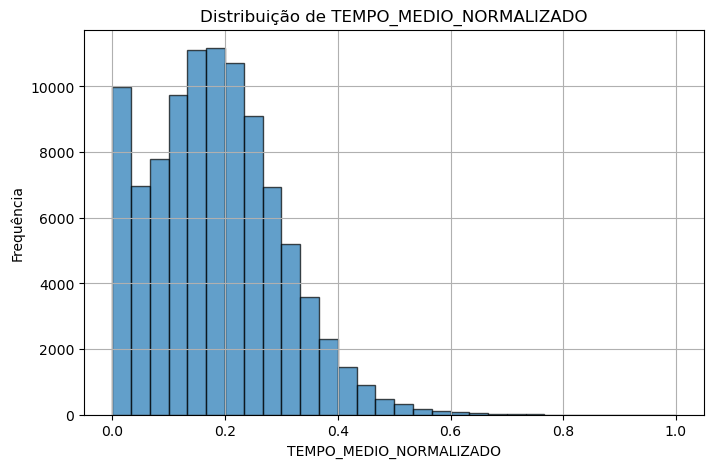

In [207]:
# Histograma para TEMPO_MEDIO_NORMALIZADO
plt.figure(figsize=(8, 5))
amostra_dados['TEMPO_MEDIO_NORMALIZADO'].dropna().hist(bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribuição de TEMPO_MEDIO_NORMALIZADO")
plt.xlabel("TEMPO_MEDIO_NORMALIZADO")
plt.ylabel("Frequência")
plt.show()

<Figure size 800x500 with 0 Axes>

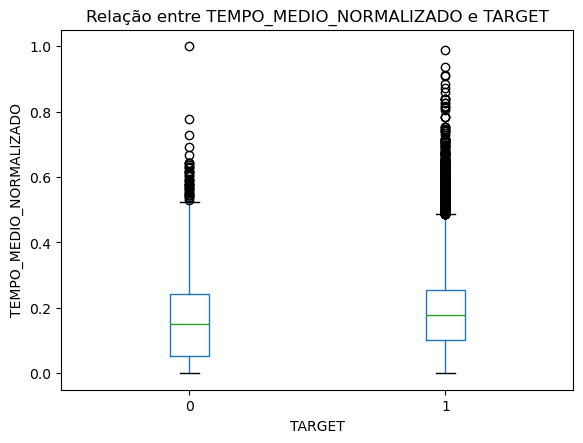

In [209]:
# BoxPlot para relação entre TEMPO_MEDIO_NORMALIZADO e TARGET
plt.figure(figsize=(8, 5))
amostra_dados.boxplot(column='TEMPO_MEDIO_NORMALIZADO', by='TARGET', grid=False)
plt.title("Relação entre TEMPO_MEDIO_NORMALIZADO e TARGET")
plt.suptitle("")  # Remove o título padrão do Pandas
plt.xlabel("TARGET")
plt.ylabel("TEMPO_MEDIO_NORMALIZADO")
plt.show()

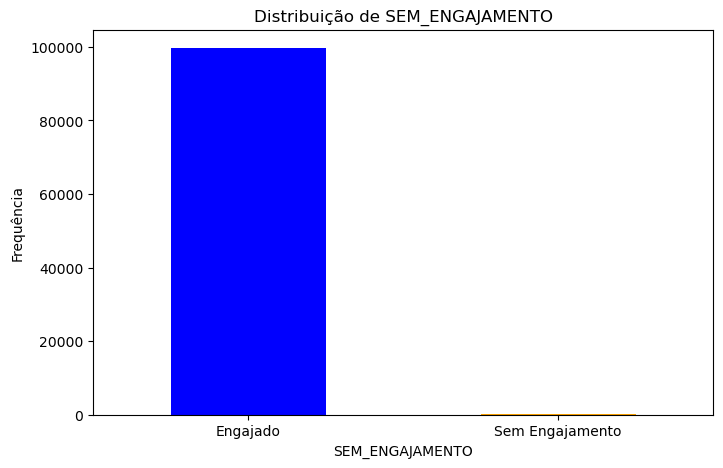

In [211]:
# Histograma para SEM_ENGAJAMENTO
plt.figure(figsize=(8, 5))
amostra_dados['SEM_ENGAJAMENTO'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribuição de SEM_ENGAJAMENTO")
plt.xlabel("SEM_ENGAJAMENTO")
plt.ylabel("Frequência")
plt.xticks([0, 1], labels=["Engajado", "Sem Engajamento"], rotation=0)
plt.show()

<Figure size 800x500 with 0 Axes>

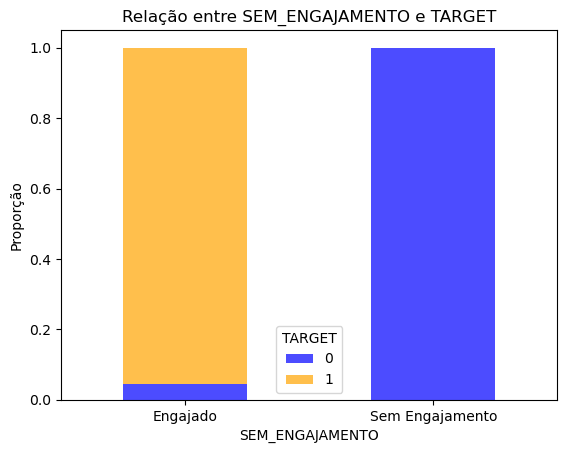

In [213]:
# Relação entre SEM_ENGAJAMENTO e TARGET
plt.figure(figsize=(8, 5))
pd.crosstab(amostra_dados['SEM_ENGAJAMENTO'], amostra_dados['TARGET'], normalize='index').plot(kind='bar', stacked=True, color=['blue', 'orange'], alpha=0.7)
plt.title("Relação entre SEM_ENGAJAMENTO e TARGET")
plt.xlabel("SEM_ENGAJAMENTO")
plt.ylabel("Proporção")
plt.xticks([0, 1], labels=["Engajado", "Sem Engajamento"], rotation=0)
plt.legend(title="TARGET", labels=["0", "1"])
plt.show()

## Normalização

In [218]:
from sklearn.preprocessing import MinMaxScaler

In [220]:
# Selecionar as colunas contínuas para normalização
features_continuas = ['TEMPO_TOTAL_ACESSO', 'TEMPO_MEDIO_NORMALIZADO']

In [222]:
# Inicializar o escalador
scaler = MinMaxScaler()

In [224]:
# Aplicar a normalização
engajamento[features_continuas] = scaler.fit_transform(engajamento[features_continuas])

In [226]:
print("Dados após normalização:")
print(engajamento[features_continuas].describe())

Dados após normalização:
       TEMPO_TOTAL_ACESSO  TEMPO_MEDIO_NORMALIZADO
count        7.670022e+07             7.538984e+07
mean         2.724235e-02             1.836639e-01
std          7.684433e-02             1.139745e-01
min          0.000000e+00             0.000000e+00
25%          1.255748e-03             9.923510e-02
50%          5.700563e-03             1.776522e-01
75%          2.089565e-02             2.562500e-01
max          1.000000e+00             1.000000e+00


## Treinamento Final

In [232]:
from sklearn.model_selection import train_test_split

# Features e Target
X = engajamento[['TEMPO_TOTAL_ACESSO', 'TEMPO_MEDIO_NORMALIZADO', 'SEM_ENGAJAMENTO']]
y = engajamento['TARGET']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")


Tamanho de X_train: (61360180, 3)
Tamanho de X_test: (15340045, 3)


In [236]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Reduzindo o conjunto de treino para 20% dos dados
sample_size = int(len(X_train) * 0.2)  # Usando 20% dos dados de treino
X_train_sample = X_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Configurando e treinando o modelo com a amostra menor
final_model = HistGradientBoostingClassifier(
    random_state=42,
    class_weight='balanced',
    learning_rate=0.1,
    max_depth=3,
    max_iter=300,
    min_samples_leaf=20
)

# Treinamento com a amostra reduzida
final_model.fit(X_train_sample, y_train_sample)

# Fazendo previsões
y_pred_final = final_model.predict(X_test)

# Avaliando o modelo
print("\nRelatório de Classificação - Modelo Final:")
print(classification_report(y_test, y_pred_final))
print("Acurácia do modelo final:", accuracy_score(y_test, y_pred_final))



Relatório de Classificação - Modelo Final:
              precision    recall  f1-score   support

           0       0.15      0.62      0.24    724705
           1       0.98      0.82      0.89  14615340

    accuracy                           0.81  15340045
   macro avg       0.56      0.72      0.57  15340045
weighted avg       0.94      0.81      0.86  15340045

Acurácia do modelo final: 0.8128166507986124


## Análise Final dos Resultados:

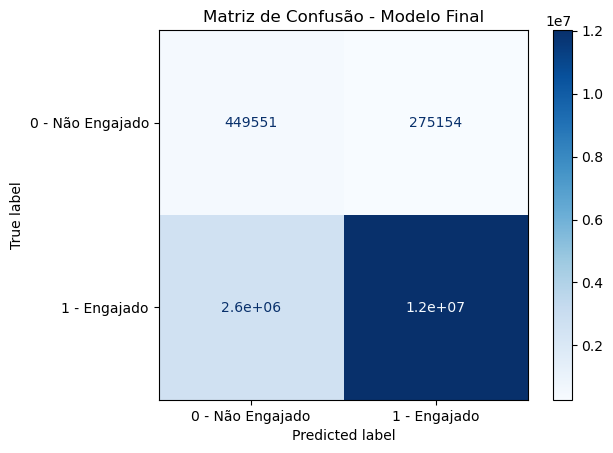

In [240]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0 - Não Engajado", "1 - Engajado"])

# Exibir matriz de confusão
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Modelo Final")
plt.show()

449.551: True Negatives (Previsões corretas de "Não Engajado").

12.000.000+: True Positives (Previsões corretas de "Engajado").

275.154: False Positives (Erros ao prever "Engajado" para quem não é).

2.600.000: False Negatives (Erros ao prever "Não Engajado" para quem é).

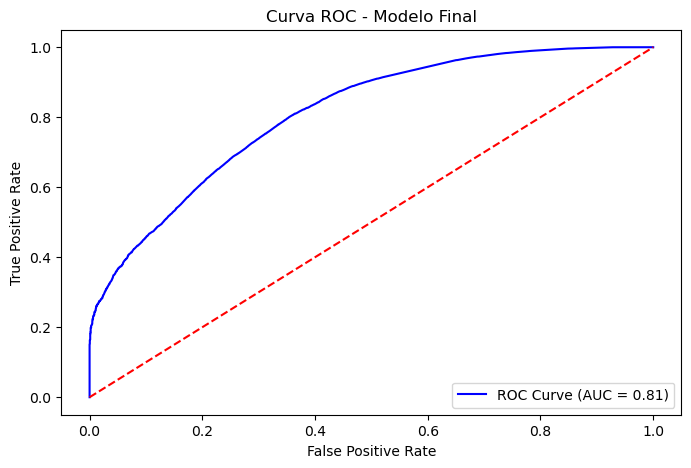

In [242]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular probabilidades preditas
y_prob = final_model.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plotar a curva ROC
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo Final")
plt.legend(loc="lower right")
plt.show()


AUC (Area Under the Curve): O valor 0.81 significa que o modelo tem 81% de chance de distinguir corretamente entre classes positivas e negativas.